In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [86]:
from xgboost import XGBClassifier

In [4]:
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, Embedding, Flatten, LSTM
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K

In [5]:
import tensorflow_hub as hub

In [6]:
train_df=pd.read_csv('train.tsv',sep='\t')
test_df=pd.read_csv('test.tsv',sep='\t')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
train_df.shape, test_df.shape

((7395, 27), (3171, 26))

In [9]:
train_df.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [10]:
test_df.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,http://www.lynnskitchenadventures.com/2009/04/...,5865,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc...",recreation,0.443906,2.558140,0.389706,0.257353,0.044118,0.022059,0.489572,0.0,0,0.067143,0,0.230285,0.199438,1,1,15,0,5643,136,3,0.242647,0.080597
1,http://lolpics.se/18552-stun-grenade-ar,782,"{""title"":""lolpics Stun grenade ar "",""body"":"" f...",culture_politics,0.135844,3.771429,0.461538,0.205128,0.051282,0.000000,0.782051,0.0,0,0.042857,0,0.365962,0.080000,?,1,62,0,382,39,2,0.128205,0.176471
2,http://www.xcelerationfitness.com/treadmills.html,6962,"{""title"":""Treadmills "",""body"":"" treadmills, st...",?,?,2.269565,0.495726,0.384615,0.170940,0.170940,1.250000,0.0,0,0.058824,0,0.161901,10.000000,?,1,42,0,2420,117,1,0.581197,0.125000
3,http://www.bloomberg.com/news/2012-02-06/syria...,7640,"{""title"":""Father s Tactics Used by Assad to Cr...",culture_politics,0.90259,2.523490,0.705502,0.346278,0.122977,0.090615,0.449366,0.0,0,0.058081,0,0.146593,0.005964,1,1,41,0,5559,309,10,0.038835,0.063126
4,http://www.wired.com/gadgetlab/2011/12/stem-tu...,3589,"{""title"":""Stem Turns Lemons and Limes Into Jui...",science_technology,0.486363,1.848000,0.470968,0.161290,0.032258,0.000000,0.453757,0.0,0,0.093023,0,0.244141,0.035714,1,0,34,0,2209,155,10,0.096774,0.065341


Replace ? with 0

In [11]:
train_df=train_df.replace('?',0)

In [17]:
test_df=test_df.replace('?',0)

Select columns used for training

In [12]:
X_train=train_df.iloc[:,4:-1]

In [21]:
X_test=test_df.iloc[:,4:]

In [13]:
Y_train=train_df.label

The classes are approximately balanced in the training set
0: 3599
1: 3796

In [14]:
np.bincount(Y_train.values)

array([3599, 3796], dtype=int64)

alchemy_category is a categorical feature

In [18]:
train_df.alchemy_category.value_counts()

0                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

In [19]:
test_df.alchemy_category.value_counts() #unknown and weather not present in test_df

0                     1046
recreation             472
arts_entertainment     422
business               355
health                 200
sports                 186
culture_politics       156
computer_internet      134
science_technology     120
religion                35
gaming                  34
law_crime               11
Name: alchemy_category, dtype: int64

One hot encoding for categorical variable

In [24]:
train_alchemy_cat=pd.get_dummies(train_df.alchemy_category,prefix='alchemy_cat')

In [25]:
test_alchemy_cat=pd.get_dummies(test_df.alchemy_category,prefix='alchemy_cat')

Concating original training and test df with one hot encoded features

In [26]:
X_train=pd.concat([X_train,train_alchemy_cat],axis=1)

In [27]:
X_test=pd.concat([X_test,test_alchemy_cat],axis=1)

In [30]:
X_train.shape, X_test.shape

((7395, 36), (3171, 34))

two categories unknown and weather is not present in test set so add all 0's to make both df's consistent

In [40]:
X_test['alchemy_cat_unknown']=0

In [46]:
X_test['alchemy_cat_weather']=0

Keeping aside 20% data for validation

In [31]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)

Training a RandomForest on just numerical features

In [32]:
model=RandomForestClassifier()

In [33]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
model.score(x_val,y_val)

0.6977687626774848

In [35]:
y_val_pred=model.predict(x_val)

In [36]:
from sklearn.metrics import average_precision_score, precision_score, recall_score
average_precision = average_precision_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

(average_precision, precision, recall)

(0.6550436693224849, 0.7275362318840579, 0.6596583442838371)

Random forest trained on only numerical features has an accuracy of around 70%, precision 0.72 and recall 0.65. Not that bad

## Let's see how we can use the boilerplate feature 

In [37]:
train_df.boilerplate[0]

'{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San Jose

Using tokenizer to convert our text to numerical data

In [106]:
tok_raw = Tokenizer()

raw_text = np.hstack([train_df.boilerplate.str.lower()])
tok_raw.fit_on_texts(raw_text)

train_df['boilerplate_tokenized']=tok_raw.texts_to_sequences(train_df.boilerplate.str.lower())

In [107]:
train_df.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,boilerplate_tokenized
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0,"[49, 4605, 5681, 13801, 1647, 628, 2657, 4072,..."
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1,"[49, 1, 1528, 3224, 5267, 1126, 3146, 13, 1033..."
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1,"[49, 1058, 13, 1521, 1, 2273, 1058, 13, 1521, ..."
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1,"[49, 86, 12689, 384, 9, 225, 311, 33, 75, 31, ..."
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0,"[49, 1, 483, 4750, 7818, 7, 385, 30, 135, 9767..."


In [108]:
#SEQUENCE VARIABLES ANALYSIS
max_text_seq = np.max( np.max(train_df['boilerplate_tokenized'].apply(lambda x: len(x))))
print("max boilerplate seq "+str(max_text_seq))

max boilerplate seq 6404


<AxesSubplot:>

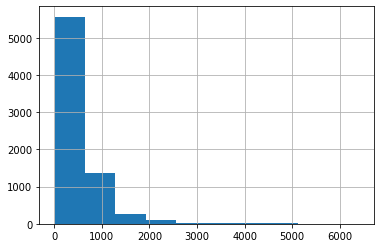

In [78]:
train_df['boilerplate_tokenized'].apply(lambda x: len(x)).hist()

Most of the values are around 5500 i.e. most of the text when converted to a list, the list len is around 5500 in most cases.
So lets set the max value as 6000

In [95]:
MAX_TEXT_SEQ=6000

Now lets find the maximum value in all the lists

In [79]:
MAX_TEXT = np.max([np.max(train_df['boilerplate_tokenized'].apply(max))])+2

In [80]:
MAX_TEXT

92200

We'll use MAX_TEXT_SEQ and MAX_TEXT in our model

Add our tokenized boilerplate feature to the training df and set aside 20% data for validation

In [88]:
X_train['boilerplate_tokenized']=train_df.boilerplate_tokenized

In [186]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)

Define a function to add padding to our text data i.e. make sure all the lists are of same length by adding 0's
Also keep the sequence and numerical variable separate

In [187]:
def get_keras_data(dataset):
    X = {
        'text': pad_sequences(dataset.boilerplate_tokenized, maxlen=MAX_TEXT_SEQ),
        'num_vars': np.array(dataset[X_train.columns.values[:-1]],dtype=float)
    }
    return X

x_train = get_keras_data(x_train)
x_val = get_keras_data(x_val)

All of our numerical columns are in num_vars dict now

In [188]:
x_train.get('num_vars').shape

(5916, 36)

Let's define our model class, we'll be using LSTM here with embedding layers for our text data (now list of ints)

In [206]:
class RnnModel:
  
  def get_model(self):
    #params
    dr_r = 0.15
    
    #Input
    text = Input(shape=[x_train['text'].shape[1]], name="text")
    num_vars = Input(shape=[x_train["num_vars"].shape[1]], name="num_vars")
    #Embeddings layer
    emb_text = Embedding(MAX_TEXT, 50)(text)
    
    #rnn layer
    rnn_layer1 = LSTM(64) (emb_text)

    main_l = rnn_layer1
    main_l = Dropout(dr_r) (Dense(32) (main_l))
    main_l = BatchNormalization() (main_l)
    main_l = Dropout(dr_r) (Dense(16) (main_l))
    main_l = BatchNormalization() (main_l)
#     main_l = Dropout(dr_r) (Dense(16) (main_l))
#     main_l = BatchNormalization() (main_l)
 
    #output
    output = Dense(1, activation="sigmoid") (main_l)
    
    #model
    print(num_vars)
    model = Model([text,num_vars], output)
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [207]:
mod=RnnModel()

In [209]:
model=mod.get_model()

Tensor("num_vars_5:0", shape=(None, 36), dtype=float32)


In [210]:
model.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, 6000)]       0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 6000, 50)     4610000     text[0][0]                       
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 64)           29440       embedding_7[0][0]                
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 32)           2080        lstm[0][0]                       
______________________________________________________________________________________

In [211]:
model.fit(x_train, y_train.values.astype(int), epochs=5, batch_size=32
          , validation_data=(x_val, y_val.values.astype(int)))

Epoch 1/5
185/185 [==============================] - 71s 382ms/step - loss: 0.5618 - accuracy: 0.7252 - val_loss: 0.5843 - val_accuracy: 0.7539
Epoch 2/5
185/185 [==============================] - 70s 377ms/step - loss: 0.2892 - accuracy: 0.8869 - val_loss: 0.5423 - val_accuracy: 0.7492
Epoch 3/5
185/185 [==============================] - 70s 380ms/step - loss: 0.1229 - accuracy: 0.9625 - val_loss: 0.6339 - val_accuracy: 0.7492
Epoch 4/5
185/185 [==============================] - 72s 389ms/step - loss: 0.0675 - accuracy: 0.9826 - val_loss: 0.7668 - val_accuracy: 0.7559
Epoch 5/5
185/185 [==============================] - 71s 386ms/step - loss: 0.0427 - accuracy: 0.9894 - val_loss: 0.9449 - val_accuracy: 0.7458


Clearly this model is overfitting with training accuracy aroun 99% and validation accuracy around 75%. 
We can optimize it by reducing the model complexity, adding regularization, etc

But let's do something better, we can convert the entire text to a vector that has sentence level encoding (as opposed to our tokenization which has word level encdoing and we needed a sequential model such as LSTM in that case) 

In [220]:
train_df.boilerplate[0]

'{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San Jose

### We'll use USE (Universal Sentence Encoder) from tensorflow hub for that 

In [47]:
use_model_version = '4'
module_url = "https://tfhub.dev/google/universal-sentence-encoder/" + use_model_version
get_use_embd = hub.load(module_url)

USE takes in a sentence as a vector and returns a vector of size 512

So let's define a couple of dataframes for train and test embeddings

In [48]:
train_use_embed_df=pd.DataFrame(columns=range(512))

In [52]:
test_use_embed_df=pd.DataFrame(columns=range(512))

Had to use a loop here insead of vectorization because of resourceExhaustedError, so we'll add the embedding one at a time

In [49]:
for i in range(7395):
    train_USE_embeddings=get_use_embd(np.array([train_df.boilerplate[i]]))
    train_use_embed_df=train_use_embed_df.append(pd.Series(train_USE_embeddings.numpy().ravel()),ignore_index=True)

In [53]:
for i in range(3171):
    test_USE_embeddings=get_use_embd(np.array([test_df.boilerplate[i]]))
    test_use_embed_df=test_use_embed_df.append(pd.Series(test_USE_embeddings.numpy().ravel()),ignore_index=True)

All the values are between range of -1 to 1

In [50]:
train_use_embed_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,-0.004476,-0.054279,-0.054848,0.031696,-0.049243,-0.047500,-0.006676,-0.052975,-0.048020,-0.049001,-0.045181,-0.040287,0.054096,-0.054141,0.029859,-0.032768,0.053316,0.041819,0.040936,-0.054548,0.033752,-0.049688,0.053347,0.053584,0.050147,0.054841,0.021293,-0.033098,-0.052422,0.017450,-0.011433,0.021731,0.049444,-0.054873,-0.000311,-0.017595,-0.054879,0.054501,-0.052486,-0.011277,0.053990,0.038030,-0.026887,-0.032953,-0.049708,0.053448,-0.051513,-0.041807,0.040593,-0.054207,-0.040866,0.020615,-0.054668,0.042921,-0.054810,-0.032484,-0.054712,0.054873,0.053678,-0.054602,0.041612,-0.053873,-0.019461,-0.054444,-0.003517,-0.051463,0.051210,0.054787,-0.054577,0.054819,-0.052914,0.054815,0.021843,0.053601,0.054626,-0.054883,0.054797,-0.054309,0.036846,0.044478,-0.016803,0.001045,0.053802,0.048145,-0.037422,-0.043789,-0.053295,-0.041069,0.053726,0.052579,0.028785,0.054050,0.034433,-0.035603,-0.027269,0.054637,0.054822,0.054879,0.054882,-0.022224,0.053126,0.046760,-0.051960,0.031104,-0.020060,0.053359,-0.023505,-0.053435,0.030050,-0.003608,-0.054629,0.041687,0.023137,-0.054713,-0.051227,-0.041680,-0.051209,-0.026051,0.035995,-0.038751,-0.034399,-0.018189,-0.030170,0.054272,0.054382,-0.041409,0.051520,-0.054879,0.050073,0.053964,-0.051013,0.052915,0.054106,0.011537,0.014957,0.053989,-0.047333,0.027591,-0.051289,-0.054833,-0.054575,0.054884,-0.054799,-0.016760,0.054884,-0.054062,0.053350,-0.044650,-0.000345,0.053345,-0.054164,-0.053995,-0.054355,-0.052778,-0.046690,0.045084,0.054278,-0.025480,-0.053986,-0.051926,0.036474,0.037003,-0.021602,0.043868,0.050187,-0.053552,0.054874,0.050151,-0.054883,-0.045686,0.054884,0.048737,0.037650,-0.054677,0.046795,-0.054430,-0.006073,0.016740,-0.053413,-0.036145,-0.046228,-0.053359,-0.034837,-0.053747,0.054749,0.036798,-0.054655,-0.054830,0.047583,-0.045409,0.054877,-0.044737,-0.050759,-0.016127,-0.041866,-0.053360,-0.029505,0.054144,0.040948,0.010277,-0.051921,0.022698,0.044248,-0.054444,0.019313,-0.053456,0.035408,-0.037791,0.054881,-0.038345,0.051062,-0.030138,0.054405,0.054839,-0.044808,0.04749

In [54]:
test_use_embed_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,-0.038467,-0.059483,0.056360,0.022980,0.053646,0.059798,0.019508,-0.016521,0.045066,0.040333,-0.055863,-0.030484,0.009107,-0.021682,-0.060171,0.059872,-0.027957,0.047619,0.035602,0.025474,-0.050706,-0.059478,0.056059,0.056199,0.023546,-0.046209,0.031669,0.054805,-0.036734,0.005054,0.011305,-0.012643,-0.038210,-0.057450,0.011151,0.018151,-0.054412,0.009116,0.060163,-0.002142,0.000266,-0.007465,0.060170,-0.048883,-0.060165,0.004220,0.053196,0.049900,0.028898,-0.054686,-0.056511,0.059220,-0.015843,0.038519,-0.003148,0.014136,-0.051455,0.059525,-0.048766,0.004268,0.030637,0.005339,-0.052269,0.025687,-0.043104,0.035252,0.053306,-0.004557,0.048987,0.004848,-0.019447,0.060158,0.053132,-0.040417,-0.051144,0.001516,0.012249,0.060163,-0.059462,-0.055675,-0.000135,-0.053930,0.001342,0.022297,-0.040504,0.015179,-0.038686,-0.059379,-0.056715,-0.003026,0.015775,0.049297,0.005357,-0.053938,0.060171,0.043749,0.040403,0.053687,0.041854,-0.059997,-0.049420,0.020200,-0.021271,-0.019251,0.017144,-0.030090,0.060090,-0.058134,0.037716,-0.058373,0.028974,0.033132,-0.042764,0.022643,0.041957,-0.022359,-0.051168,-0.018777,-0.048923,0.058284,0.023319,0.006398,-0.052168,-0.019316,-0.056592,-0.051185,0.058431,0.022604,0.034699,-0.036227,0.011373,0.060171,-0.000580,-0.028794,-0.056087,0.056916,-0.021664,0.043131,-0.055625,0.058183,-0.044417,0.060134,-0.027502,-0.011244,-0.004497,0.017421,-0.047439,-0.026040,0.054967,-0.014203,-0.050318,-0.040032,-0.060170,-0.040961,0.030887,0.006091,0.057486,-0.026415,0.038610,-0.003435,0.052735,0.038783,0.055329,0.059171,0.008549,0.044944,0.039138,-0.057425,-0.060152,-0.017801,0.059998,0.056907,-0.047334,-0.022806,0.044582,-0.059566,0.059979,-0.058477,0.031675,-0.054438,0.060162,0.018206,-0.052611,-0.052139,0.052357,0.000453,-0.060170,0.038486,0.059564,0.049436,-0.031830,0.009523,0.045352,-0.060171,-0.060170,-0.027557,0.027932,-0.060071,0.060135,-0.049129,0.048913,0.057872,0.019013,0.060170,0.000730,0.058582,0.043794,-0.059447,-0.056349,0.018335,-0.032168,-0.035324,0.057149,0.053790,-0.001060,-0.041371,0.052400,0.0561

Let's concatenate our numerical and embedding features

In [55]:
X_train=pd.concat([X_train,train_use_embed_df],axis=1)

In [56]:
X_test=pd.concat([X_test,test_use_embed_df],axis=1)

In [59]:
X_train.shape,X_test.shape

((7395, 548), (3171, 548))

In [60]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)

Training a RandomForest on this data. (Now we have sentence level encoding, the 512 dim vector returned by USE already has the sequences encoded so we don't have to use LSTM or any other sequential model now)

In [61]:
model=RandomForestClassifier()

In [62]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
model.score(x_val,y_val)

0.8140635564570656

Now the validation accuracy is around 81.4%. Much better that before, let's check some other metrics

In [66]:
y_val_pred=model.predict(x_val)

Precision is 0.86 and recall is 0.75

In [67]:
from sklearn.metrics import average_precision_score, precision_score, recall_score
average_precision = average_precision_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

(average_precision, precision, recall)

(0.7796997099452234, 0.8648648648648649, 0.7568988173455979)

Let's generate a classification report and check classwise metrics

In [70]:
from sklearn.metrics import classification_report
classification_report(y_val, y_val_pred,output_dict=True)

{'0': {'precision': 0.7724477244772447,
  'recall': 0.8746518105849582,
  'f1-score': 0.8203788373612019,
  'support': 718},
 '1': {'precision': 0.8648648648648649,
  'recall': 0.7568988173455979,
  'f1-score': 0.8072880168185004,
  'support': 761},
 'accuracy': 0.8140635564570656,
 'macro avg': {'precision': 0.8186562946710548,
  'recall': 0.8157753139652781,
  'f1-score': 0.8138334270898511,
  'support': 1479},
 'weighted avg': {'precision': 0.8199997487064394,
  'recall': 0.8140635564570656,
  'f1-score': 0.8136431278054237,
  'support': 1479}}

For class 0, precision is 0.77 and recall is 0.87. For class 1 precision is 0.86 and recall is 0.75. And accuracy of our model is 81.4%.

In [71]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       718
           1       0.86      0.76      0.81       761

    accuracy                           0.81      1479
   macro avg       0.82      0.82      0.81      1479
weighted avg       0.82      0.81      0.81      1479



The model's performance is satisfactory for now, let's train the model again on full data and generate predictions for test set

In [72]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [74]:
test_prediction=model.predict(X_test)

In [80]:
sub_df=pd.DataFrame({'urlid':test_df.urlid.values, 'label':test_prediction})
sub_df

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,1
...,...,...
3166,7264,1
3167,9714,1
3168,5903,1
3169,3176,1


In [81]:
sub_df.to_csv("submission.csv",index=False)